<a href="https://colab.research.google.com/github/GiovaniMicheloni/mlearning-w-python/blob/main/base_risco2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip -q install plotly
!pip -q install yellowbrick
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [10]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [11]:
x_risco_credito = base_risco_credito.iloc[:,0:4].values
y_risco_credito = base_risco_credito.iloc[:,4].values

In [12]:
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
label_enconder_historia = LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantia = LabelEncoder()
label_enconder_renda = LabelEncoder()


In [14]:
x_risco_credito[:,0] = label_enconder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_enconder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_enconder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_enconder_renda.fit_transform(x_risco_credito[:,3])

In [15]:
x_risco_credito


array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [16]:
import pickle
with open('risco_credito.pkl', 'wb')as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)

In [17]:
from sklearn.naive_bayes import GaussianNB
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

In [18]:
#novo cliente 1 = historia boa(0), divida alta(0), garantia nenhuma(1), renda >35(2)
#novo cliente 2 = historia ruim(2), divida alta(0), garantia adequada(0), renda >15(0)
previsao = naive_risco_credito.predict([[0,0,1,2],[2,0,0,0]])

In [19]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [20]:
naive_risco_credito.classes_


array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [21]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [22]:
naive_risco_credito.class_prior_ #porcentagem da quantidade nas classes apriori
#42% estao na classe alto, 35.7 na baixo e 21 na moderado

array([0.42857143, 0.35714286, 0.21428571])

# Arvore de decisão

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
arvore_risco_credito = DecisionTreeClassifier(criterion ='entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [25]:
arvore_risco_credito.feature_importances_
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

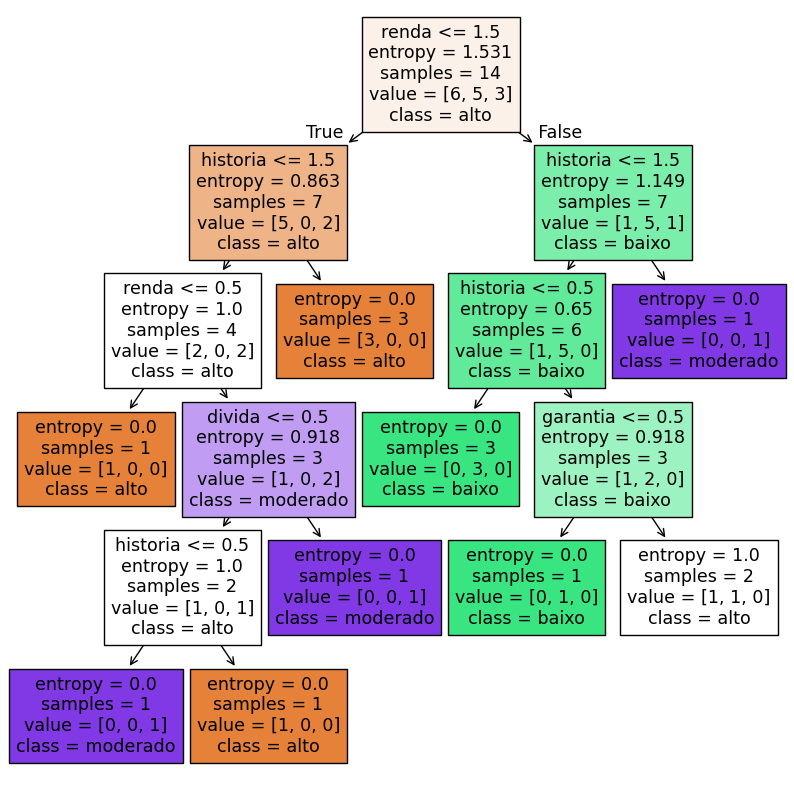

In [26]:
from sklearn import tree
previsores = ['historia','divida','garantia','renda']
figura, eixos = plt.subplots(nrows = 1, ncols =1, figsize = (10,10))
tree.plot_tree(arvore_risco_credito, feature_names = previsores, class_names = arvore_risco_credito.classes_ , filled=True);

In [27]:
#novo cliente 1 = historia boa(0), divida alta(0), garantia nenhuma(1), renda >35(2)
#novo cliente 2 = historia ruim(2), divida alta(0), garantia adequada(0), renda >15(0)
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)